In [1]:
import sys
import os
import geopandas as gpd
import pandas as pd

sys.path.append(os.path.abspath(os.path.join(os.pardir)))

from VASA import VASA

In [17]:
from VASA.vasa import filter_data, filter_map

columns = [
    'sg_sheltered', "sg_avg_dist2"
]

date_col = "ds_m4"
fips_col = "fips"


mob_data = pd.read_csv("../data/all_minor_sources.csv", usecols=[*columns, date_col, fips_col])


titles = [
    '% sheltered (Safegraph)', 'Avg Distance Travelled (m) (Safegraph)'
]

mob_data = mob_data[["ds_m4", "fips", *columns]]

# Read the map 
usa_map_data = pd.read_json("../data/counties.json")
usa_map = gpd.GeoDataFrame \
    .from_features(usa_map_data["features"]) \
    .set_crs(epsg=4326) \
    .to_crs("+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs")
usa_map = usa_map.assign(fips=[int(g) for g in usa_map["GEOID"]])
usa_map = filter_map(usa_map)

# Group the data into weeks
data = filter_data(mob_data, fips_col)
# grouped_usa = group_data(data, columns, date_col, fips_col, by="week")

In [18]:
v = VASA(data.dropna(), usa_map, date_col="ds_m4")
v.group() # calculate weekly averages

In [ ]:
v

In [4]:
v.lisa()

In [5]:
v.df # this looks fine -- there isnt the missing value error because i did .dropna()

,date,sg_avg_dist2,sg_sheltered
0,2020-01-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, ..."
1,2020-01-06,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, ..."
2,2020-01-13,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, ..."
3,2020-01-20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,2020-01-27,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,2020-02-03,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,2020-02-10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, ..."
7,2020-02-17,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,2020-02-24,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, ..."
9,2020-03-02,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, ..."


---- CC.head() ----
source        val
sg_avg_dist2  1       2
              2       5
              3       1
sg_sheltered  1      22
              2      12
              3       1
              4       3
dtype: int64
   letter_abbr  val  count        source
4           CA    2      1  sg_avg_dist2
7           CT    2      1  sg_avg_dist2
11          HI    3      1  sg_avg_dist2
16          MA    2      1  sg_avg_dist2
18          MD    2      2  sg_avg_dist2
(46, 4)
--- ppiv.head() ---
source letter_abbr  val  sg_avg_dist2  sg_sheltered
0               AL    2           NaN          49.0
1               AR    2           NaN          37.0
2               AR    4           NaN           1.0
3               AZ    1           NaN           5.0
4               CA    1           NaN          37.0
--ppiv 2222222222 ---
  letter_abbr  val  sg_avg_dist2  sg_sheltered  cnt        name num_code
0          AL    2           NaN          73.1   67     Alabama       01
1          AR    2         

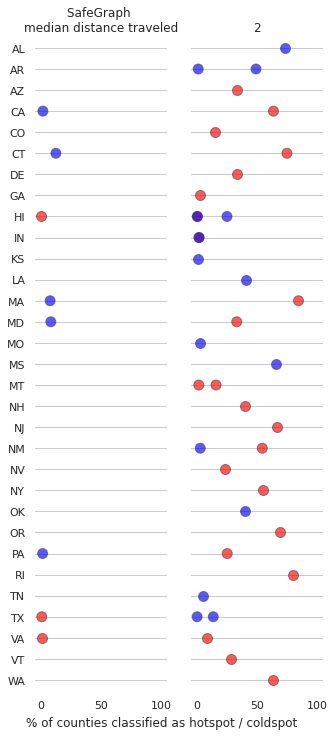

In [5]:
from VASA.stripplot import Strip
strp = Strip(v)
strp.plot()

# something is clearly going wrong because you can see two blue circles for a state...

# CBG DATA

In [2]:
cbg_data = pd.read_csv("../data/sg_cbg.csv")

In [3]:
cbg_data.columns

Index(['origin_census_block_group', 'date_range_start', 'device_count',
       'distance_traveled_from_home', 'bucketed_distance_travelled',
       'completely_home_device_count', 'median_percentage_time_home',
       'mean_distance_traveled_from_home', 'county_fips', 'cbg_fips'],
      dtype='object')

In [4]:
selected_county_data = cbg_data[[c in [6037] for c in cbg_data["county_fips"]]][["distance_traveled_from_home", "cbg_fips", "date_range_start"]]
selected_county_data["fips"] = ["0" + str(f) for f in selected_county_data["cbg_fips"]]

<AxesSubplot:>

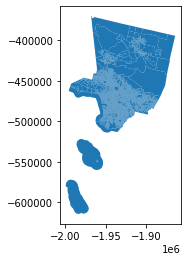

In [5]:
all_counties = gpd.read_file("../data/ca_cbg")
#counties = all_counties[[c in ["037", "111", "029", "059"] for c in all_counties["COUNTYFP"]]]
counties = all_counties[[c in ["037"] for c in all_counties["COUNTYFP"]]] # just LA

counties_map = gpd.GeoDataFrame \
    .from_features(counties) \
    .set_crs(epsg=4326) \
    .to_crs("+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs")

counties_map.plot(linewidth=0)

In [19]:
v1 = VASA(selected_county_data.dropna().reset_index(drop=True), 
    counties, gdf_group_col="GEOID", date_col="date_range_start", date_format="%Y-%m-%d %H:%M:%S%z"
)

In [20]:
v1.group()

In [55]:
import numpy as np

# need to remove fips from fips array aswell
d = np.array(v1.df["distance_traveled_from_home"].tolist())

print(len(d[0]))

len(d[:, ~np.all(np.isnan(d), axis=0)][0])

6591


5086

In [20]:
v1.df.iloc[-1]["distance_traveled_from_home"] # last row looks fine

0       1198.000000
1       3543.333333
2       2335.000000
3       4754.000000
4       2130.000000
           ...     
6586    3533.000000
6587    4515.333333
6588    1547.333333
6589    1864.000000
6590    1801.000000
Name: distance_traveled_from_home, Length: 6591, dtype: float64

In [16]:
v1.lisa()

('WARNING: ', 3544, ' is an island (no neighbors)')


/home/alex/Desktop/github/VASA/myenv/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 3544.
  warnings.warn(message)


ValueError: cannot reshape array of size 0 into shape (0)

In [26]:
v1.gdf.iloc[3544] # this is the cbg that is the error listed above /\ 
                  # when you filter this out of the dataframe, you just keep on getting more of this error
                  # + it would be difficult to filter this out in an automatic way
                  # it *could* just be the shapefile - but Im using the tiger one from the census so I dont know what else people would use

STATEFP                                                    06
COUNTYFP                                                  037
TRACTCE                                                599100
BLKGRPCE                                                    1
GEOID                                            060375991001
NAMELSAD                                        Block Group 1
MTFCC                                                   G5030
FUNCSTAT                                                    S
ALAND                                               146821156
AWATER                                              531145894
INTPTLAT                                          +32.9255700
INTPTLON                                         -118.4972902
geometry    POLYGON ((-118.678204 33.039726, -118.675605 3...
Name: 14169, dtype: object

In [15]:
v1.W

In [51]:
v1.W.to_file("cbg_weights.txt")

AttributeError: 'VASA' object has no attribute 'W'